<a href="https://colab.research.google.com/github/mjcast94/DM2023-Lab2-Master/blob/main/DM2023_Lab2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Information
Name: Amanda Castellanos

Student ID: 112065426

GitHub ID: mjcast94

Kaggle name: manda

Kaggle private scoreboard snapshot:
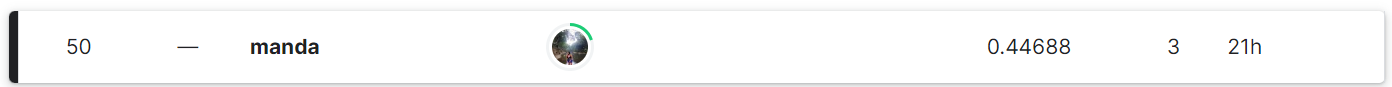


---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

In [1]:
### Begin Assignment Here
##Part 1
#allow Collaboratory access to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#necessary access to folders and libraries
import os
folder_path = '/content/drive/MyDrive/NTHU/Data Mining/DM2023-Lab2-Master/DM2023-Lab2-Master'
os.chdir(folder_path)

##necessary library requirements
import pandas as pd
import numpy as np

import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

Mounted at /content/drive


In [2]:
#Exercise 1 - Answer here

#import libraries
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import plotly.express as px

# Top 30 words for Training Dataset

#Count Vectorizer
count_vect_train = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df['text'])

# Term Frequencies
term_frequencies_train = train_counts.sum(axis=0).A1

terms_df_train = pd.DataFrame({
    'Term': count_vect_train.get_feature_names_out(),
    'Frequency': term_frequencies_train
})

terms_df_train = terms_df_train.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Top 30 terms
top30_terms_df_train = terms_df_train.head(30)
print(top30_terms_df_train)

#Bar graph
fig_test = px.bar(top30_terms_df_train, x='Term', y='Frequency',
                  title='Top 30 Word Frequencies - Training Dataset',
                  labels={'Frequency': 'Word Frequency', 'Term': 'Words'},
                  width=1000, height=500)

fig_test.update_layout(xaxis=dict(tickangle=45))
fig_test.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


    Term  Frequency
0    the       1736
1     to       1289
2    and        955
3    you        796
4     of        793
5     is        787
6     it        717
7     in        626
8   that        537
9     my        535
10   for        446
11    on        390
12    be        383
13    me        380
14  this        350
15    so        328
16  have        312
17   not        303
18  just        301
19   but        293
20  with        288
21    at        269
22   can        257
23   all        243
24  like        243
25   are        231
26  your        229
27   was        228
28  when        226
29    if        216


In [3]:
# Top 30 words for Testing Dataset

#Count Vectorizer
count_vect_test = CountVectorizer()
test_counts = count_vect_test.fit_transform(test_df['text'])

# Term Frequencies
term_frequencies_test = test_counts.sum(axis=0).A1

terms_df_test = pd.DataFrame({
    'Term': count_vect_test.get_feature_names_out(),
    'Frequency': term_frequencies_test
})

terms_df_test = terms_df_test.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Top 30 terms
top30_terms_df_test = terms_df_test.head(30)
print(top30_terms_df_test)

#Bar graph
fig_test = px.bar(top30_terms_df_test, x='Term', y='Frequency',
                  title='Top 30 Word Frequencies - Testing Dataset',
                  labels={'Frequency': 'Word Frequency', 'Term': 'Words'},
                  width=1000, height=500)

fig_test.update_layout(xaxis=dict(tickangle=45))
fig_test.show()

    Term  Frequency
0    the        153
1     to        138
2    and         92
3     of         83
4     it         83
5    you         82
6     is         77
7     in         69
8    for         57
9   that         55
10    my         52
11    on         46
12    be         40
13    me         36
14    so         34
15   was         34
16   can         32
17  have         30
18   all         30
19    at         30
20  just         29
21  with         29
22   are         29
23   get         26
24   but         26
25   not         24
26    up         24
27  like         24
28  your         24
29  this         24


In [4]:
#Exercise 2 - Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (TF-IDF)
TF_vectorizer = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TF_vectorizer.fit(train_df['text'])
TF_vectorizer_features_1000 = TF_vectorizer.transform(train_df['text'])

## check dimension
TF_vectorizer_features_1000.shape

#display as array for better visibility
TF_vectorizer_features_1000.toarray()

# feature names
feature_names_1000 = TF_vectorizer.get_feature_names_out()
feature_names_1000[100:110]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [ ]:
#Exercise 3
# Answer here
#Joy had the lowest score of wrong predictions (23/79)
#Sadness had the highest score of wrong predictions (27/74)
#The model finds the most difficulty with labeling sadness
#Anger and Fear were most commonly confused for one another
#For the emotions joy, sadness, and anger - they were wrongly labeled as fear more common than other emotions


In [6]:
#Exercise 4 - Answer here
#libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# training and testing data
X_train_NB = BOW_500.transform(train_df['text'])
Y_train_NB = train_df['emotion']

X_test_NB = BOW_500.transform(test_df['text'])
Y_test_NB = test_df['emotion']

#build Naives Bayes Model
NB_model = MultinomialNB()
NB_model.fit(X_train_NB, Y_train_NB)
train_pred = NB_model.predict(X_train_NB)
test_pred = NB_model.predict(X_test_NB)


## accuracy
acc_train_NB = accuracy_score(y_true=Y_train_NB, y_pred=train_pred)
acc_test_NB = accuracy_score(y_true=Y_test_NB, y_pred=test_pred)

print('training accuracy: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy: {}'.format(round(acc_test_NB, 2)))

## precision, recall, f1-score,
print(classification_report(y_true=Y_test_NB, y_pred=test_pred))

## check by confusion matrix
CM_NB = confusion_matrix(y_true=Y_test_NB, y_pred=test_pred)
print(CM_NB)

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


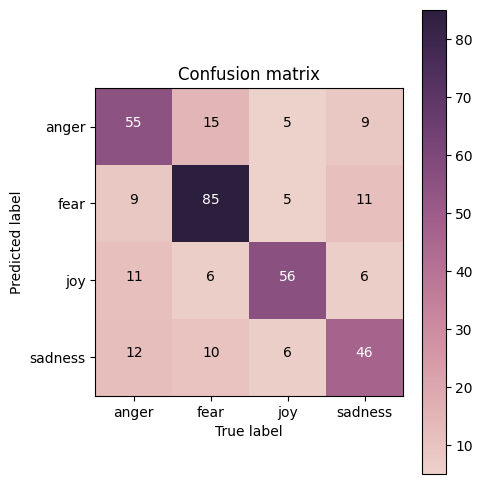

In [7]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(CM_NB, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(CM_NB, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(CM_NB.shape[1]),
           yticks=np.arange(CM_NB.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = CM_NB.max() / 2.
    for i, j in itertools.product(range(CM_NB.shape[0]), range(CM_NB.shape[1])):
        plt.text(j, i, format(CM_NB[i, j], fmt), horizontalalignment="center", color="white" if CM_NB[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()


# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(CM_NB, classes=my_tags, title='Confusion matrix')

In [ ]:
# Exercise 5 - Answer here
# The Naive Bayes (NB) is more suited for categoral data than numeric values. Decision Tree (DT) can handle both
# NB works well with large datasets
# DT is typically used for more complex data
#Given the same set of data, there was no significant difference in the performance.
#Rather, NB scored higher for fear and joy, while DT scored higher in anger and sadness
#NB accurately labeled fear better than DT which could be due to DT's tendency to overfit

In [8]:
#Other things to try
#Naive Bayes classifier with TF-IDF
#libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


# training and testing data
X_train_NB = TF_vectorizer.transform(train_df['text'])
Y_train_NB = train_df['emotion']

X_test_NB = TF_vectorizer.transform(test_df['text'])
Y_test_NB = test_df['emotion']

#build Naives Bayes Model
NB_model = MultinomialNB()
NB_model.fit(X_train_NB, Y_train_NB)
train_pred = NB_model.predict(X_train_NB)
test_pred = NB_model.predict(X_test_NB)


## accuracy
acc_train_NB = accuracy_score(y_true=Y_train_NB, y_pred=train_pred)
acc_test_NB = accuracy_score(y_true=Y_test_NB, y_pred=test_pred)

print('training accuracy: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy: {}'.format(round(acc_test_NB, 2)))

## precision, recall, f1-score,
print(classification_report(y_true=Y_test_NB, y_pred=test_pred))

## check by confusion matrix
CM_NB = confusion_matrix(y_true=Y_test_NB, y_pred=test_pred)
print(CM_NB)


training accuracy: 0.88
testing accuracy: 0.77
              precision    recall  f1-score   support

       anger       0.74      0.76      0.75        84
        fear       0.78      0.79      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.72      0.74      0.73        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347

[[64 11  4  5]
 [10 87  2 11]
 [ 7  5 62  5]
 [ 5  9  5 55]]


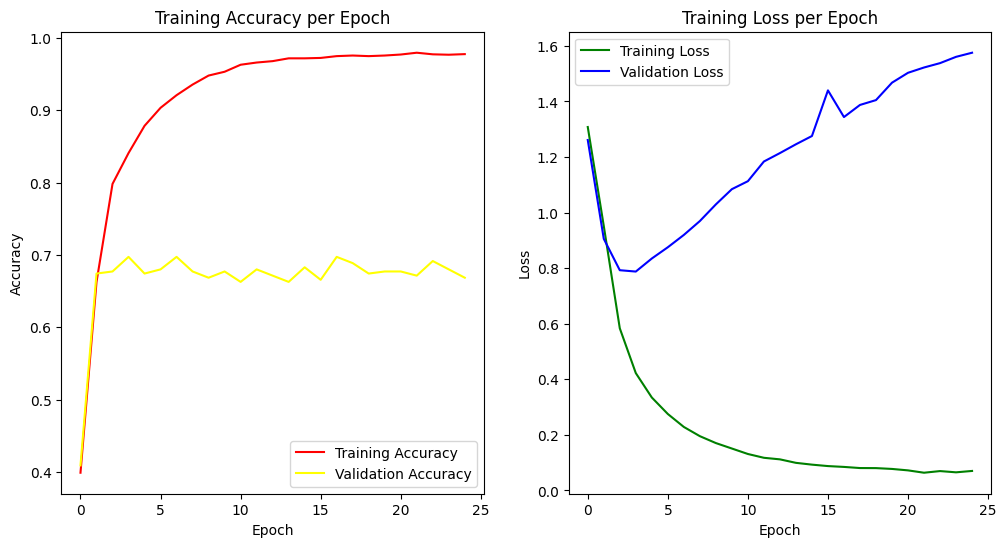

In [9]:
#Exercise 6
#Answer here
import matplotlib.pyplot as plt

#training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', color='red')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='yellow')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss', color='green')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color='blue')
plt.style
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

In [ ]:
#Exercise 7 - Answer here
#We can add a word embedding layer at the beginning of our model.
#This new layer would learn the word representations during training
#so when it receives the sequence of words (sentence) as input data it can convert
#each word into it's corrresponding word vector

In [10]:
#Exercise 8 - Answer here

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/NTHU/Data Mining/DM2023-Lab2-Master/DM2023-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)


word_list2 = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words2 = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words2)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

load ok
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Sa